# Proyecto I- Parte IV (Core)
Análisis y Predicción de Ventas en una Tienda de Retail

# Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.



## Continuar desde la Parte III
Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('../data/vgsales_clonado.csv')
print(df.shape)
df.head(5)

(16598, 12)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Desviacion_Ventas
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.172681
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.301659
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.233899
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,32.432681
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.746767


## Análisis Descriptivo y Visualización

In [ ]:
# Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
df.describe()

In [ ]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
# Crear histograma de la columna 'Global_Sales'
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear histograma de la columna 'NA_Saless'
plt.figure(figsize=(10, 6))
plt.hist(df['NA_Sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear boxplot de la columna 'Global_Sales' menores a 80 solo por motivos de tener una mejor visualizacion al tener menos dispersion

df_filtrado = df[df['Global_Sales'] <= 80]

# Crear el boxplot con el DataFrame filtrado
plt.figure(figsize=(12, 8)) 
sns.boxplot(x='Year', y='Global_Sales', data=df_filtrado, palette='Set3')
plt.title('Distribución de Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

ventas_por_año = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_año['Year'], ventas_por_año['Global_Sales'], marker='o', color='skyblue')
plt.title('Ventas Globales a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
ventas_por_año = df.groupby('Year')['NA_Sales'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_año['Year'], ventas_por_año['NA_Sales'], marker='o', color='skyblue')
plt.title('Ventas Globales a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
ventas_por_año = df.groupby('Year')['EU_Sales'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_año['Year'], ventas_por_año['EU_Sales'], marker='o', color='skyblue')
plt.title('Ventas Globales a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Los 3 ultimos graficos presentan una variacion similar en las ventas, seria una comparacion de las ventas nivel global con las ventas por region
en Norteamerica y Europa

In [ ]:
# Ventas de NA vs Ventas de EU
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df, hue='Genre', palette='Set2', alpha=0.7)
plt.title('Ventas en NA vs Ventas en EU')
plt.xlabel('Ventas en NA (millones)')
plt.ylabel('Ventas en EU (millones)')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_filtrado_sub10 = df[df['Global_Sales'] <= 5]
# Crear el histograma de ventas filtradas
plt.figure(figsize=(12, 6))
sns.histplot(df_filtrado_sub10['Global_Sales'], bins=20, color='skyblue', kde=True)
plt.title('Distribución de Ventas Globales (hasta 10 millones)')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Continuar desde la Parte IV
Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

# Exploración de Datos Avanzada
Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

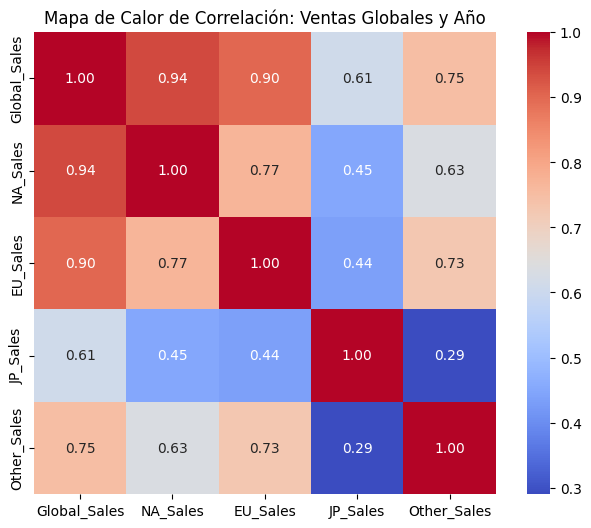

In [60]:
df_filtered = df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].dropna()  # Eliminar filas con valores nulos

# Calcula la correlación
correlation = df_filtered.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Mapa de Calor de Correlación: Ventas Globales y Año')
plt.show()

Text(0.5, 1.0, 'Ventas en Otros vs Ventas Globales')

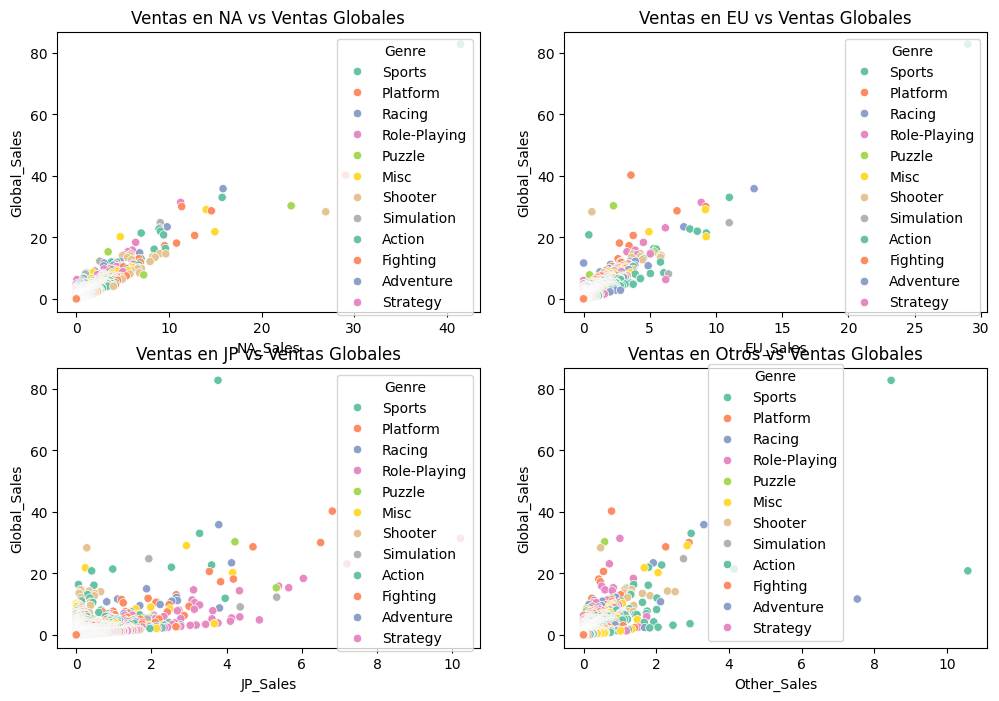

In [52]:
# Crea subplots para comparar diferentes variables clave.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df, ax=axes[0, 0], hue='Genre', palette='Set2')
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=df, ax=axes[0, 1], hue='Genre', palette='Set2')
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=df, ax=axes[1, 0], hue='Genre', palette='Set2')
sns.scatterplot(x='Other_Sales', y='Global_Sales', data=df, ax=axes[1, 1], hue='Genre', palette='Set2')

axes[0, 0].set_title('Ventas en NA vs Ventas Globales')
axes[0, 1].set_title('Ventas en EU vs Ventas Globales')
axes[1, 0].set_title('Ventas en JP vs Ventas Globales')
axes[1, 1].set_title('Ventas en Otros vs Ventas Globales')

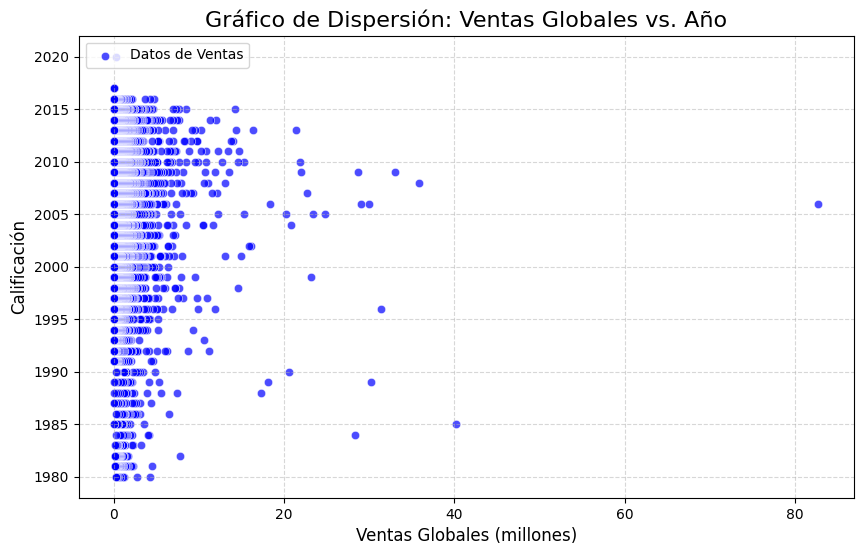

In [61]:
# Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

df_filtered = df[['Global_Sales', 'Year']].dropna()  # Eliminar filas con valores nulos

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Global_Sales', y='Year', color='blue', alpha=0.7)

# Agregar cuadrículas
plt.grid(True, linestyle='--', alpha=0.5)

# Agregar flechas de ejemplo (puedes ajustar las coordenadas según tus datos)
plt.annotate('', xy=(3, 4), xytext=(1, 2),
             arrowprops=dict(facecolor='red', shrink=0.05, lw=2))
plt.annotate('Ejemplo de Flecha', xy=(1.5, 2.5), fontsize=10, color='red')

# Configurar etiquetas y título
plt.title('Gráfico de Dispersión: Ventas Globales vs. Año', fontsize=16)
plt.xlabel('Ventas Globales (millones)', fontsize=12)
plt.ylabel('Calificación', fontsize=12)

# Agregar leyenda
plt.legend(['Datos de Ventas'], loc='upper left')

# Mostrar el gráfico
plt.show()

En este ultimo grafico se puede ver algo muy interesante en donde muestra una epoca dorada en la venta de videojuegos
Se puede observar muchas ventas por encima de los 10 millones USD entre el 2005 y el 2015 que puede deberse a distintos factores